In [60]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
import time 

In [59]:
X_NN = np.load("X_NN.npy")
y_NN = np.load("y_NN.npy")

X_scaler = MinMaxScaler().fit(X_NN)
y_scaler = MinMaxScaler().fit(y_NN)
X_NN_scaled = X_scaler.transform(X_NN) 
y_NN_scaled = y_scaler.transform(y_NN)
   
X_train, X_test, y_train, y_test = train_test_split(X_NN_scaled, y_NN_scaled, test_size=0.2)

In [64]:
param_AI_0 = keras.Sequential([
    keras.Input(shape=(8,)),
    layers.Dense(200, activation='relu', name="Layer1"), 
    #layers.Dense(50, activation='relu', name="Layer2"), 
    layers.Dense(6, name="Parameter_Guesses")
])
param_AI_0.summary()
param_AI_0.compile(optimizer='adam', loss='mse')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 200)               1800      
_________________________________________________________________
Parameter_Guesses (Dense)    (None, 6)                 1206      
Total params: 3,006
Trainable params: 3,006
Non-trainable params: 0
_________________________________________________________________


In [72]:
t1 = time.time()
hist = param_AI_0.fit(X_train, y_train, epochs=50, verbose=2)
hist = hist.history
print("Training time = {} seconds.".format(round(time.time()-t1,2)))

Epoch 1/50
1250/1250 - 1s - loss: 0.0261
Epoch 2/50
1250/1250 - 1s - loss: 0.0260
Epoch 3/50
1250/1250 - 1s - loss: 0.0260
Epoch 4/50
1250/1250 - 1s - loss: 0.0260
Epoch 5/50
1250/1250 - 1s - loss: 0.0258
Epoch 6/50
1250/1250 - 1s - loss: 0.0258
Epoch 7/50
1250/1250 - 1s - loss: 0.0256
Epoch 8/50
1250/1250 - 1s - loss: 0.0257
Epoch 9/50
1250/1250 - 1s - loss: 0.0256
Epoch 10/50
1250/1250 - 1s - loss: 0.0255
Epoch 11/50
1250/1250 - 1s - loss: 0.0254
Epoch 12/50
1250/1250 - 2s - loss: 0.0254
Epoch 13/50
1250/1250 - 1s - loss: 0.0252
Epoch 14/50
1250/1250 - 1s - loss: 0.0253
Epoch 15/50
1250/1250 - 1s - loss: 0.0251
Epoch 16/50
1250/1250 - 1s - loss: 0.0251
Epoch 17/50
1250/1250 - 1s - loss: 0.0251
Epoch 18/50
1250/1250 - 1s - loss: 0.0250
Epoch 19/50
1250/1250 - 1s - loss: 0.0249
Epoch 20/50
1250/1250 - 1s - loss: 0.0249
Epoch 21/50
1250/1250 - 2s - loss: 0.0248
Epoch 22/50
1250/1250 - 2s - loss: 0.0247
Epoch 23/50
1250/1250 - 2s - loss: 0.0247
Epoch 24/50
1250/1250 - 1s - loss: 0.0247
E

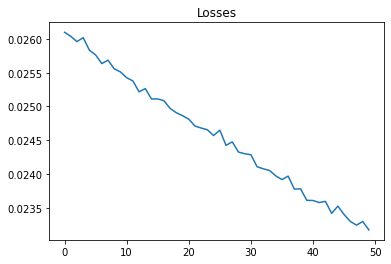

In [73]:
loss = hist['loss']

plt.plot(loss)
plt.title('Losses')
fig.tight_layout()
plt.show()

In [74]:
param_AI_0.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0234


0.023414775729179382

In [57]:
param_AI_0.save('models\model1')
dump(X_scaler, open('models\X_scaler1.pkl','wb'))
dump(y_scaler, open('models\y_scaler1.pkl','wb'))

INFO:tensorflow:Assets written to: models\model1\assets
